In [1]:
import transformers
import torch

import copy
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from tqdm import tqdm

from torch import nn, optim
from torch.utils import data

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE","#FFDD00","#FF7D00","#FF006D","#ADFF02","#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 8,6

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 2000)

In [3]:
df = pd.read_csv('data/review_apps/apps_review_tiktok-nonrating.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEaxCuEU61SHHaTHDs-GydVhgd4rWOIwMDUgatmJAvDFNtYVLljaCMfs3ktQBzYU7roFf_t3-dgPlen1bE,Dapur Mama Hoshi,https://play-lh.googleusercontent.com/a/AATXAJwMgNzuc9QVAMP8yRdeu2bLKwtO3Z5zrDw_EL27=mo,"Aplikasinya sebenarnya bagus..Tp knp skrg sy masuk akun sy hilang, tertulis frekuensi masuk terlalu sering. Apa maksudnya?? Sampai2 sy hapus aplikasi ini trus sy restart hp sy, download kembali tetap seperti itu. Tolong penjelasannya. Sementara sy kasih bintang 1 sebelum semuanya kembali seperti semula.",1,40,19.5.43,2021-05-28 13:20:53,NaN,NaN,most_relevant,com.ss.android.ugc.trill
1,gp:AOqpTOFTLjgAcC2zQ2D3ZzHVdnqBqjVgpqXo9h-bdYiFcM6TFMrnEdJssfWbhl4A8GPFC76ZsOk6jNyHSPgGelA,Luluk Muawalah,https://play-lh.googleusercontent.com/a/AATXAJyMU12NePbxeA6jB-_0ASb7i3T-RogGGtKuYser=mo,"Tolong kepada pihak tiktok, kenapa tiba2 saya tidak bisa masuk tiktok? Padahal kemaren2 masih bisa n Muter2 trus, padahal jaringan wi-fi untuk yg lainnya lancar, kenapa pas masuk tiktok tiba2 wi-fi gabisa di pake/ada tulisan ""tidak ada sinyal"" cpt di perbaiki, kalo sudah nanti aku kasih 5bintang",1,23,19.5.43,2021-05-27 23:15:58,NaN,NaN,most_relevant,com.ss.android.ugc.trill
2,gp:AOqpTOE6ScCvmXVBy1lRWOkmbYo68Z2dbNwPYF2kvR_iM-wW3Z8dYin4fsON2Rn0Z4AQzHI8XTcbxqR3X2Uk8sk,Marcelino Laoh,https://play-lh.googleusercontent.com/a/AATXAJzxAeNPhvqdDGJFmubvtArHbFOUxb9n4BjIqwih=mo,"Saya sangat kecewa kepada pihak tiktok akun saya di blokir padahal saya tidak pernah melakukan hal"" aneh dan saya di tiktok cuman Menonton vidio"" orang tidak pernah mengaplod konten tapi tiba"" akun tiktok saya di blokir,,, saya ingin membuat akun baru buat menonton video Tiktok lagi tapi malah g bisa setiap kali mendaftar malah tertulis "" Ups akun kamu sedang di tangguhkan sementara"" kan gak jelas banget pdhl saya di tiktok cuman menonton Vidio orang",1,9,19.5.43,2021-05-28 20:45:01,NaN,NaN,most_relevant,com.ss.android.ugc.trill
3,gp:AOqpTOFkctHg8Z8qjrxGcwAgFyYtCSCxeXkPX7olSS78A9ZFuUjBe0htJtx6MJoWV68frdx9eJPO1vIUINP_byc,Ni Putu Dian M. Dewi,https://play-lh.googleusercontent.com/a-/AOh14GijySQEapMno_Oyv9XYGLwW6K4AIfH9reVcr3MATA,Jujur ni ya gue gak puas banget sama tiktok sekarang kenapa waktu like udah banyak yg nonton udah banyak baru bilang pelanggaran apa apa in nihhh jelek banget tuh komen gue terhadap tiktok nending kalian dowliad yang lain jangan tiktok karna tiktok gak adil sekarang!!!!!!!,1,6,19.5.43,2021-05-29 07:32:08,NaN,NaN,most_relevant,com.ss.android.ugc.trill
4,gp:AOqpTOGVXq7aRXCxIdeYO7Gs09rbtiZEqSbgfRyjmNWqeck5TANPM4k8Ke0gFuFTkG5Au4m6zu3KeG6iv2t7NAo,Aat Safaat,https://play-lh.googleusercontent.com/a-/AOh14GjuWSaMVsSAC9FNP97a4HlcF8UTXq5vlsYW-29c,Aplikasi Haram!!!!!!!!!!!!!!!!!!!!!!!!! ¡!¡!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!?!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!?!!!!!!!!!!!? Tapi bener,1,4,19.5.43,2021-05-28 16:15:16,NaN,NaN,most_relevant,com.ss.android.ugc.trill


In [4]:
df.shape

(2200, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
reviewId                2200 non-null object
userName                2200 non-null object
userImage               2200 non-null object
content                 2200 non-null object
score                   2200 non-null int64
thumbsUpCount           2200 non-null int64
reviewCreatedVersion    1723 non-null object
at                      2200 non-null object
replyContent            1 non-null object
repliedAt               1 non-null object
sortOrder               2200 non-null object
appId                   2200 non-null object
dtypes: int64(2), object(10)
memory usage: 206.4+ KB


C:\Users\Niken Amelia\miniconda3\envs\env_scrap\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review score')

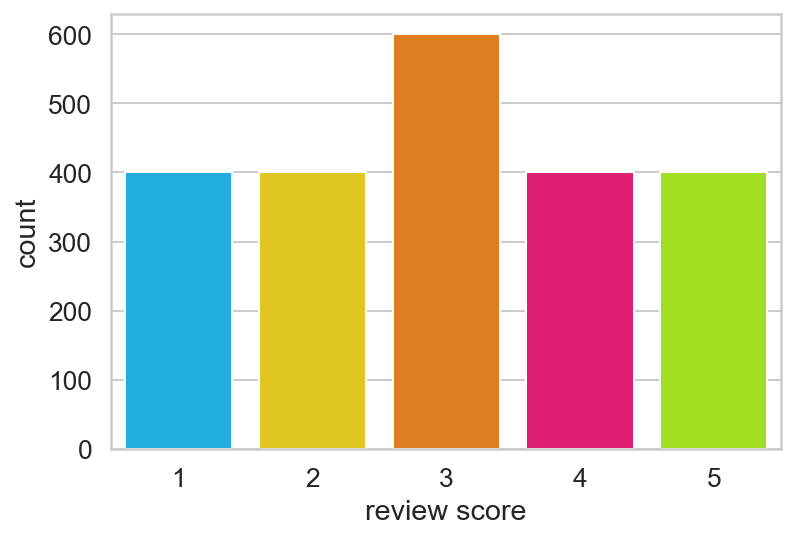

In [6]:
sns.countplot(df.score)
plt.xlabel('review score')

In [7]:
def to_sentiment(rating):
    rating = int(rating)
    if rating <=2:
        return 0
    elif rating == 3:
        return 1
    else: 
        return 2

In [8]:
df['sentiment'] = df.score.apply(to_sentiment)

In [9]:
class_names = ['negative','neutral','positive']

C:\Users\Niken Amelia\miniconda3\envs\env_scrap\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


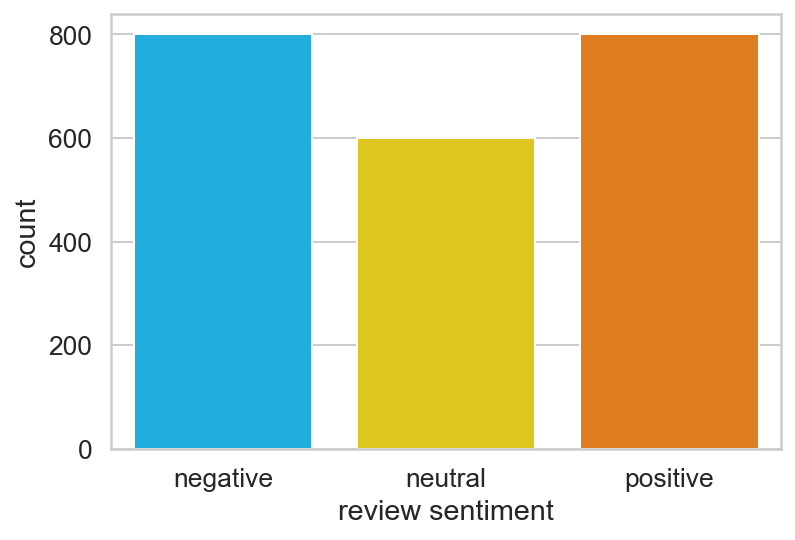

In [10]:
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

### Data Preprocessing

In [11]:
from transformers import BertTokenizer, BertModel

model_name='cahya/bert-base-indonesian-522M'
tokenizer = BertTokenizer.from_pretrained(model_name)

In [12]:
sample_txt = 'saya pergi ke pasar bersama teman teman'

In [13]:
tokens = tokenizer.tokenize(sample_txt)

In [14]:
tokens

['saya', 'pergi', 'ke', 'pasar', 'bersama', 'teman', 'teman']

##### sentence tokenizer

In [39]:
tokens = ["mau pasar",
              "aku tidak tahu",
              "aku suka kamu"
              ]

In [40]:
tokens = [tokenizer.tokenize(str(token)) for token in tokens]
tokens

[['mau', 'pasar'], ['aku', 'tidak', 'tahu'], ['aku', 'suka', 'kamu']]